In [1]:
import qiskit
import qiskit.visualization as viz

In [2]:
circuit = qiskit.QuantumCircuit(1,1)

In [3]:
circuit.h = 0

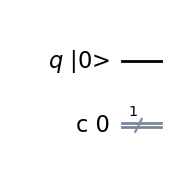

In [4]:
circuit.draw(output="mpl",initial_state=True) 

In [5]:
circuit.measure(0,0)

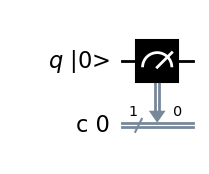

In [6]:
circuit.draw(output="mpl",initial_state=True) 

In [7]:
qc_output = qiskit.QuantumCircuit(8)

In [8]:
qc_output.measure_all()

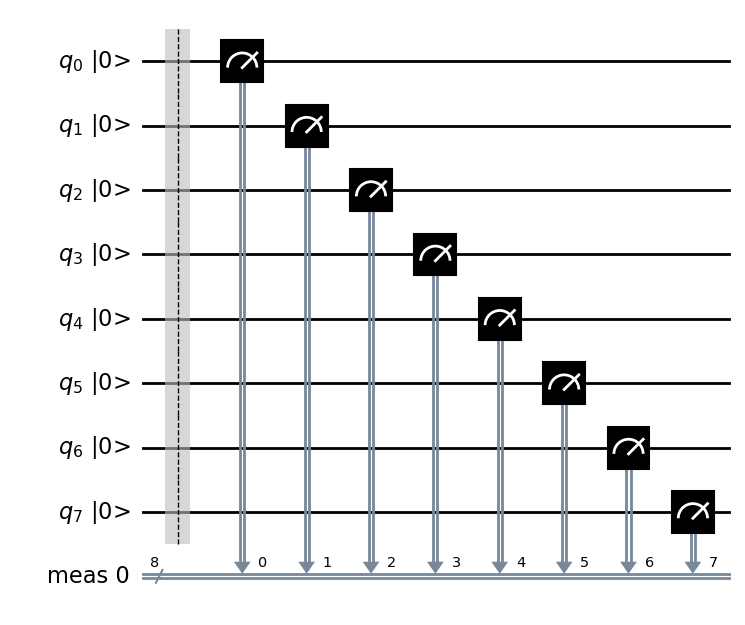

In [9]:
qc_output.draw(output="mpl",initial_state=True) 

In [10]:
#sim = qiskit.Aer.get_backend('aer_simulator') 
#result = sim.run(qc_output).result()
#counts = result.get_counts()
#plot_histogram(counts)

In [17]:
qc_encode = qiskit.QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [18]:
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas_0: ═════════╩══╬══╬══╬══╬══╬══╬══╬═
                    ║  ║  ║  ║  ║  ║  ║ 
meas_1: ════════════╩══╬══╬══╬══╬══╬══╬═
                       ║  ║  ║  ║  ║  ║ 
meas_2: ═══════════════╩══╬══╬══╬══╬══╬═
                          ║  ║  ║  ║  ║ 
meas_3: ══════════════════╩══╬══╬══╬══╬═
                             ║  ║  ║  ║ 
meas_4: ═════════════════════╩══╬══╬══╬═
                                ║  ║  ║ 
meas_5: ════════════════════════╩══╬══╬═
                                   ║  ║ 
meas_6: ═══════════════════════════╩══╬═
                                      ║ 
meas_7: ══════════════════════════════╩═

In [15]:
#sim = Aer.get_backend('aer_simulator') 
#result = sim.run(qc_encode).result()
#counts = result.get_counts()
#plot_histogram(counts)

In [19]:
qc_encode = qiskit.QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(5)

qc_encode.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     └───┘
q_6: ─────
          
q_7: ─────

In [20]:
qc_cnot = qiskit.QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [21]:
qc = qiskit.QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [22]:
qc_ha = qiskit.QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c_0: ══════════════════════╩══╬═
                              ║ 
c_1: ═════════════════════════╩═

In [23]:
qc_ha = qiskit.QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c_0: ═══════════════════════════╩══╬═
                                   ║ 
c_1: ══════════════════════════════╩═

In [26]:
qobj =qiskit.assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
qiskit.plot_histogram(counts)

AttributeError: module 'qiskit' has no attribute 'sim'

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table